# Preliminary Data Analytic Pipeline 
Provide a coded solution for each area below.  Where appropriate show output and explanations/insights.  Make sure it runs properly.
You will need to install if required just

!pip install < lib >
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/) 
* [sklearn](https://scikit-learn.org/stable) 
* [ydata_profiling](https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html)

In [1104]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from copy import deepcopy
import random
#from ydata_profiling import ProfileReport
#from ydata_profiling.utils.cache import cache_file
import pprint
pp = pprint.PrettyPrinter(indent=4)

## Data Integration
Select a data store for **categorization** noting multiple input (X) features and one or more label(s) (y). For example if it is a fraud data set having multiple input features such as age, salary, transaction cost, etc and a label indicating fraudulent or not.  If you are ahead of the curve, you make work on the data set for your final project but it is not necessary.  One option is select the data from [kaggle.com](https://www.kaggle.com/datasets). Bring the data into a pandas dataframe. Do not select unstructured, free-form text or graphic data for this assignment. 
* Note why you selected this data set.


Data chosen from Kaggle: 
https://www.kaggle.com/datasets/mcfurland/10-m-beatport-tracks-spotify-audio-features?resource=download

This data aligns similarly with what I aim to do for my project. It contains many numeric features and categorical ones such as the mode or time signature that could be used as a classification variables.

#### From the data information page

About this file

    isrc - International Standard Recording Code. Internationally recognized identification tool for sound and music video recordings. Used to match Spotify and Beatport tracks. (Primary Key)

Considerations: A single ISRC can be assigned to multiple Spotify tracks and multiple Beatport tracks. These are fundamentally the same track with the same track metadata and audio file. Think:

    Including a single on an album
    Re-releasing several singles as an EP, mixtape or album
    Re-releasing songs as a compilation, anthology or greatest hits

    acousticness [0, 1] - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

    danceability [0, 1] - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

    duration_ms - The duration of the track in milliseconds.

    energy [0, 1] - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

    instrumentalness [0, 1] - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

    key [-1, 11] - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

    liveness [0, 1] - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

    loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

    mode 0 or 1 - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

    speechiness [0, 1] - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

    tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

    time_signature [3,7] - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

    valence [0, 1] - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    
    
    






In [1037]:
# Dataset "10+ M. Beatport Tracks / Spotify Audio Features" from Kaggle
# https://www.kaggle.com/datasets/mcfurland/10-m-beatport-tracks-spotify-audio-features?resource=download

# data integration
file_path = "/rapids/notebooks/workspace/archive/audio_features.csv"
audio_feat_df = pd.read_csv(file_path)

In [1038]:
# Show top 5 rows of data file
audio_feat_df.head(5)

,isrc,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,updated_on
0,AD4X65752184,0.906000,0.650,296733,0.350,0.775,3,0.1140,-11.777,1,0.0284,110,4,0.336,8/24/2023 9:27
1,AEA0D1991170,0.000950,0.621,191989,0.639,0.820,7,0.5060,-9.258,1,0.0775,140,4,0.346,8/24/2023 9:30
2,AEA0Q2004008,0.031200,0.692,282904,0.980,0.866,9,0.0969,-9.952,1,0.0881,140,4,0.225,8/24/2023 9:30
3,AEA0Q2004009,0.000558,0.516,197904,0.924,0.434,5,0.1530,-13.564,0,0.2200,148,4,0.204,8/24/2023 9:30
4,AEA0Q2004010,0.009380,0.587,199471,0.910,0.804,0,0.5630,-10.552,1,0.0596,136,4,0.321,8/24/2023 9:30


In [1039]:
print(len(audio_feat_df))

1048575


## Format and Type
Determine the format of the file and the types of each feature.

In [1040]:
# Print helper
def print_helper(vals, formats):
    format_str = ' '.join(formats)
    print(format_str % vals)
    return

In [1072]:
## format and type
data_types = audio_feat_df.dtypes

print("File type: {}".format(file_path.split(".")[1]) + "\n")

print("Column data types: \n")
print(data_types)

File type: csv

Column data types: 

isrc                 object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo                 int64
time_signature        int64
valence             float64
updated_on           object
dtype: object


## Analysis
Determine the dynamics of each feature (int/float - math stats, text - categorical or not)

In [1073]:
# Store dynamics in dictionary for use later on
feature_dynamic = {}

In [1074]:
# Handles the case of int64 features. Small inte
def print_ints(audio_feat_df, feature_dynamic, formats, column):
    num_unique_vals = len(audio_feat_df[column].unique())
    if num_unique_vals < 14:
        dynamic = "categorical"
        vals = (column, col_dtype, num_unique_vals, dynamic)
        print_helper(vals, formats)
    else:
        dynamic = "math/stats"
        vals = (column, col_dtype, num_unique_vals, dynamic)
        print_helper(vals, formats)
    feature_dynamic[column] = dynamic
    return

In [1075]:
# Anaylsis

header_vals = ("Feature Type", "Data Type", "Num Values", "Dynamic")
print_helper(header_vals, formats)

for column in audio_feat_df.columns:
    col_dtype = audio_feat_df[column].dtype
    if col_dtype == "float64":
        dynamic = "math/stats"
        vals = (column, col_dtype, "", dynamic)
        print_helper(vals, formats)
        feature_dynamic[column] = dynamic
    elif col_dtype == "int64":
        print_ints(audio_feat_df, feature_dynamic, formats, column)
    else:
        dynamic = "discarded"
        vals = (column, col_dtype, "", dynamic)
        print_helper(vals, formats)
        feature_dynamic[column] = dynamic

# pprint dynamics for debugging
# pp.pprint(feature_dynamic)

      Feature Type       Data Type      Num Values         Dynamic
              isrc          object                       discarded
      acousticness         float64                      math/stats
      danceability         float64                      math/stats
       duration_ms           int64          295890      math/stats
            energy         float64                      math/stats
  instrumentalness         float64                      math/stats
               key           int64              12     categorical
          liveness         float64                      math/stats
          loudness         float64                      math/stats
              mode           int64               2     categorical
       speechiness         float64                      math/stats
             tempo           int64             218      math/stats
    time_signature           int64               5     categorical
           valence         float64                      math/s

## Clean up
* Find and List number of blank entries and outliers/errors
* Take corrective actions and provide justification
* Remove unnecessary features
* If a categorical approach breakout the input features (X) from the output features (y)

### Since the objects "isrc" and "updated_on" provide no value, they will be eliminated from the analysis:

In [1076]:
audio_feat_df_removed = audio_feat_df.drop("isrc", axis=1)
audio_feat_df_removed = audio_feat_df_removed.drop("updated_on", axis=1)

audio_feat_df_removed.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.906000,0.650,296733,0.350,0.775,3,0.1140,-11.777,1,0.0284,110,4,0.336
1,0.000950,0.621,191989,0.639,0.820,7,0.5060,-9.258,1,0.0775,140,4,0.346
2,0.031200,0.692,282904,0.980,0.866,9,0.0969,-9.952,1,0.0881,140,4,0.225
3,0.000558,0.516,197904,0.924,0.434,5,0.1530,-13.564,0,0.2200,148,4,0.204
4,0.009380,0.587,199471,0.910,0.804,0,0.5630,-10.552,1,0.0596,136,4,0.321


### Number of invalid entries will either be imputed with their mean or removed based on data type and number missing

In [1077]:
def print_num_invalid(dataframe):
    formats = ["%18s", "%15s", "%15s", "%15s", "%15s", "%15s"]
    header_vals = ("Feature Type", "Data Type", "Num Null", "Perc Null", "Num NA", "Perc NA")
    print_helper(header_vals, formats)
    for column in dataframe.columns:

        col_dtype = dataframe[column].dtype

        num_null = dataframe[column].isnull().sum()
        perc_null = round(num_null/len(dataframe), 2)

        num_na = dataframe[column].isna().sum()
        perc_na = round(num_na/len(dataframe), 2)
                           
        vals = (column, col_dtype, str(num_null), str(perc_null), str(num_na), str(perc_na))

        print_helper(vals, formats)
    return

### First the number of blanks and NAs will be checked for each column in the dataset

Check number invalid

In [1078]:
print_num_invalid(audio_feat_df_removed)

      Feature Type       Data Type        Num Null       Perc Null          Num NA         Perc NA
      acousticness         float64               0             0.0               0             0.0
      danceability         float64               0             0.0               0             0.0
       duration_ms           int64               0             0.0               0             0.0
            energy         float64               0             0.0               0             0.0
  instrumentalness         float64               0             0.0               0             0.0
               key           int64               0             0.0               0             0.0
          liveness         float64               0             0.0               0             0.0
          loudness         float64               0             0.0               0             0.0
              mode           int64               0             0.0               0             0.0
       spe

### Since no blanks exist, random nans will be installed for each feature

Pandas treats nans and nulls exactly the same, so only the nans will be set.

Helper function to set random samples of column to nan

In [1079]:
def set_random(dataframe, column, num_random_samples, random_type):
    random_samples = dataframe[column].sample(n=num_random_samples).index
    dataframe[column].loc[random_samples] = random_type
    return dataframe

Loops over all columns and sets a random number of each to nan

In [1080]:
def randomize_blanks_nas(audio_feat_df_invalids, max_random_nans):
    for column in audio_feat_df_invalids.columns:
        num_nans = random.randint(0, max_random_nans)
        col_dtype = audio_feat_df_invalids[column].dtype
        audio_feat_df_invalids = set_random(audio_feat_df_invalids, column, num_nans, np.nan)
    return audio_feat_df_invalids

### Set random number of each column to NAN

In [1081]:
# Set max random amount of nan inserts
max_random_nan_perc = .07 # Percent of data that will be set to nan
max_random_nans = int(max_random_nan_perc*len(audio_feat_df_removed))

audio_feat_df_invalids = audio_feat_df_removed.copy(deep=True)
audio_feat_df_invalids = randomize_blanks_nas(audio_feat_df_invalids, max_random_nans)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [1082]:
print_num_invalid(audio_feat_df_invalids)

      Feature Type       Data Type        Num Null       Perc Null          Num NA         Perc NA
      acousticness         float64           10014            0.01           10014            0.01
      danceability         float64            1305             0.0            1305             0.0
       duration_ms         float64           53275            0.05           53275            0.05
            energy         float64           26409            0.03           26409            0.03
  instrumentalness         float64            8188            0.01            8188            0.01
               key         float64           14974            0.01           14974            0.01
          liveness         float64           41132            0.04           41132            0.04
          loudness         float64           23450            0.02           23450            0.02
              mode         float64           34027            0.03           34027            0.03
       spe

### Now NANS are set, the math/stats dynamic columns with <5% NANS will be imputed with the features mean. Columns >5% will have their NA rows discarded

In [1083]:
def discard_below_thresh(dataframe, feature_dynamic, perc_thresh):
    
    decision = {}
    columns = dataframe.columns
    num_non_empty = perc_thresh*len(dataframe)

    for column in dataframe.columns:
        perc_na = dataframe[column].isnull().sum()/len(dataframe)
        if perc_na > perc_thresh:
            dataframe = dataframe[dataframe[column].notna()]
            decision[column] = "NA Columns removed"
        else:
            decision[column] = "NA Columns not removed"

    return dataframe, decision

### Impute the math/stats dynamic columns with <5% NANS with mean value. Impute the categorical dynamic columns <5% with the majority class

In [1084]:
def impute_mean_or_maj(dataframe, feature_dynamic, perc_thresh):
    
    decision = {}
    columns = dataframe.columns
    num_non_empty = perc_thresh*len(dataframe)
    
    for column in dataframe.columns:

        if feature_dynamic[column] in ["math/stats"]:
            
            num_imputed = dataframe[column].isnull().sum()
            col_dtype = dataframe[column].dtype
            col_mean = dataframe[column].mean()

            dataframe[column].fillna(value=col_mean, inplace=True)
            decision[column] = str(num_imputed) + " imputed with mean"

        # Impute majority class into categorical features
        elif feature_dynamic[column] in ["categorical"]:
            num_imputed = dataframe[column].isnull().sum()
            cat_counts = dataframe[column].value_counts()
            maj_count = cat_counts[0]
            dataframe[column].fillna(value=maj_count, inplace=True)
            decision[column] = str(num_imputed) + " imputed with majority class"

    return dataframe, decision

In [1085]:
# Define decision dictionary
decision = {}

# Copy current DF 
audio_feat_df_invalids_copy = audio_feat_df_invalids.copy(deep=True)

# Discard rows with NANs >5% for a feature
perc_thresh = 0.05
print("Removing Columns")
audio_feat_df_invalids_copy, decision = discard_below_thresh(audio_feat_df_invalids_copy, feature_dynamic, perc_thresh)
pp.pprint(decision)
num_removed = len(audio_feat_df_invalids) - len(audio_feat_df_invalids_copy)
print(str(num_removed) + " rows removed!")
print("\n")


# Impute rows with NANs <5% with a feature's mean or majority class
audio_feat_df_invalids_copy, decision = impute_mean_or_maj(audio_feat_df_invalids_copy, feature_dynamic, perc_thresh)
pp.pprint(decision)


Removing Columns
{   'acousticness': 'NA Columns not removed',
    'danceability': 'NA Columns not removed',
    'duration_ms': 'NA Columns removed',
    'energy': 'NA Columns not removed',
    'instrumentalness': 'NA Columns not removed',
    'key': 'NA Columns not removed',
    'liveness': 'NA Columns not removed',
    'loudness': 'NA Columns not removed',
    'mode': 'NA Columns not removed',
    'speechiness': 'NA Columns not removed',
    'tempo': 'NA Columns not removed',
    'time_signature': 'NA Columns removed',
    'valence': 'NA Columns not removed'}
107503 rows removed!


{   'acousticness': '8996 imputed with mean',
    'danceability': '1169 imputed with mean',
    'duration_ms': '0 imputed with mean',
    'energy': '23751 imputed with mean',
    'instrumentalness': '7318 imputed with mean',
    'key': '13371 imputed with majority class',
    'liveness': '36830 imputed with mean',
    'loudness': '21094 imputed with mean',
    'mode': '30506 imputed with majority class',
 

# Find Outliers
## Remove top and bottom 1% of values for math/stats dynamic features

In [1086]:
def remove_outliers(dataframe, feature_dynamic, outlier_perc_thresh, exclusions=[]):
    
    decision = {}
    columns = dataframe.columns
    num_non_empty = perc_thresh*len(dataframe)
    
    for column in dataframe.columns:

        orig_num = len(dataframe)
        if column in exclusions:
            continue

        if feature_dynamic[column] in ["math/stats"]:
            
            max_val = dataframe[column].max()
            min_val = dataframe[column].max()
        
            bottom_percent = outlier_perc_thresh*min_val
            top_percent = max_val - outlier_perc_thresh*max_val

            dataframe = dataframe[dataframe[column] < top_percent]
            dataframe = dataframe[dataframe[column] > bottom_percent]
            
            num_removed = orig_num - len(dataframe)
            
            decision[column] = str(num_removed) + " removed as outliers from top and bottom"
           
            
    return dataframe, decision
    

In [1087]:
# Remove 1% top and bottom outliers from math/stats dynamic features

audio_feat_df_outliers_removed = audio_feat_df_invalids_copy.copy(deep=True)
outlier_perc_thresh = .01
audio_feat_df_outliers_removed, decision = remove_outliers(audio_feat_df_outliers_removed, feature_dynamic, outlier_perc_thresh)

pp.pprint(decision)


{   'acousticness': '492286 removed as outliers from top and bottom',
    'danceability': '447 removed as outliers from top and bottom',
    'duration_ms': '6849 removed as outliers from top and bottom',
    'energy': '7436 removed as outliers from top and bottom',
    'instrumentalness': '78487 removed as outliers from top and bottom',
    'liveness': '24 removed as outliers from top and bottom',
    'loudness': '355376 removed as outliers from top and bottom',
    'speechiness': '1 removed as outliers from top and bottom',
    'tempo': '1 removed as outliers from top and bottom',
    'valence': '2 removed as outliers from top and bottom'}


There is some skewness going on with the removals performed on some of the features, investigating the histograms:

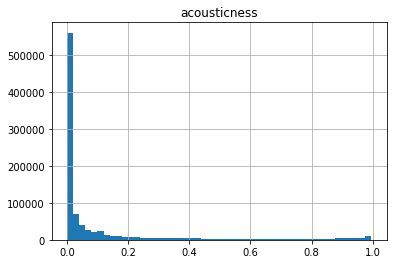

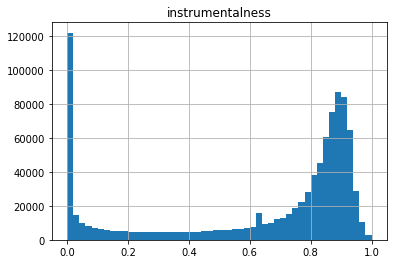

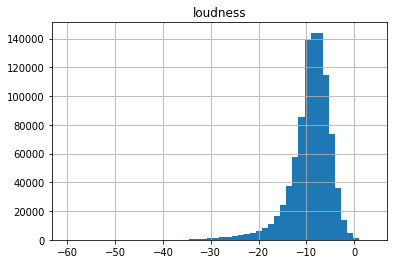

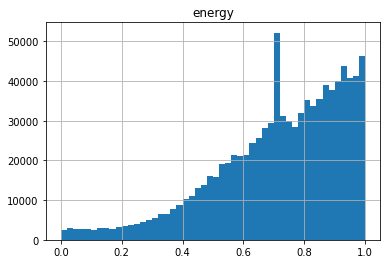

In [1089]:
acousticness_hist = audio_feat_df_invalids_copy.hist(column="acousticness", bins=50)
instrumentalness_hist = audio_feat_df_invalids_copy.hist(column="instrumentalness", bins=50)
loudness_hist = audio_feat_df_invalids_copy.hist(column="loudness", bins=50)
energy_hist = audio_feat_df_invalids_copy.hist(column="energy", bins=50)

Since these features are highly skewed, the top 1% and bottom 1% won't be removed. Columns are reverted back to their original:

In [1090]:
exclusions = ["acousticness", "instrumentalness", "loudness", "energy"]

audio_feat_df_outliers_removed = audio_feat_df_invalids_copy.copy(deep=True)
outlier_perc_thresh = .01
audio_feat_df_outliers_removed, decision = remove_outliers(audio_feat_df_outliers_removed, feature_dynamic, outlier_perc_thresh, exclusions)

pp.pprint(decision)

# audio_feat_df_outliers_removed["acousticness"] = audio_feat_df_invalids_copy["acousticness"]
# audio_feat_df_outliers_removed["instrumentalness"] = audio_feat_df_invalids_copy["instrumentalness"]
# audio_feat_df_outliers_removed["loudness"] = audio_feat_df_invalids_copy["loudness"]



{   'danceability': '751 removed as outliers from top and bottom',
    'duration_ms': '9267 removed as outliers from top and bottom',
    'liveness': '65 removed as outliers from top and bottom',
    'speechiness': '11 removed as outliers from top and bottom',
    'tempo': '294 removed as outliers from top and bottom',
    'valence': '283 removed as outliers from top and bottom'}


In [1091]:
audio_feat_df_outliers_removed.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.906000,0.650,296733.0,0.350,0.775,3.0,0.1140,-11.777,1.0,0.0284,110.0,4.0,0.336
1,0.000950,0.621,191989.0,0.639,0.820,7.0,0.5060,-9.258,1.0,0.0775,140.0,4.0,0.346
3,0.000558,0.516,197904.0,0.924,0.434,5.0,0.1530,-13.564,0.0,0.2200,148.0,4.0,0.204
4,0.009380,0.587,199471.0,0.910,0.804,0.0,0.5630,-10.552,1.0,0.0596,136.0,4.0,0.321
5,0.008540,0.656,266736.0,0.834,0.865,6.0,0.0614,-12.853,0.0,0.0507,142.0,4.0,0.685


## Normalize
Dont worry about text features but you must normalize the numeric features. 
* Provide rationale as to why the particular normalization feature was selected.

In [1092]:
def normalize_features(dataframe, feature_dynamic):
    
    decision = {}
    columns = dataframe.columns
    num_non_empty = perc_thresh*len(dataframe)
    
    for column in dataframe.columns:
        orig_num = len(dataframe)
        if feature_dynamic[column] in ["math/stats"]:
            dataframe[column] = (dataframe[column]-dataframe[column].mean())/dataframe[column].std()
            decision[column] = column + " normalized"

    return dataframe, decision

In [1093]:
# Normalize math/stats features
normalized_audio_feat_df = audio_feat_df_outliers_removed.copy(deep=True)

normalized_audio_feat_df, decision = normalize_features(normalized_audio_feat_df, feature_dynamic)

pp.pprint(decision)

normalized_audio_feat_df.head()

{   'acousticness': 'acousticness normalized',
    'danceability': 'danceability normalized',
    'duration_ms': 'duration_ms normalized',
    'energy': 'energy normalized',
    'instrumentalness': 'instrumentalness normalized',
    'liveness': 'liveness normalized',
    'loudness': 'loudness normalized',
    'speechiness': 'speechiness normalized',
    'tempo': 'tempo normalized',
    'valence': 'valence normalized'}


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,3.484157,-0.218836,-0.149293,-1.731741,0.408474,3.0,-0.385249,-0.639425,1.0,-0.706856,-0.820947,4.0,-0.279846
1,-0.485061,-0.407517,-0.584241,-0.368382,0.541372,7.0,2.001908,-0.041585,1.0,-0.100334,0.689246,4.0,-0.240999
3,-0.486780,-1.090669,-0.559679,0.976108,-0.598590,5.0,-0.147751,-1.063538,0.0,1.659939,1.091964,4.0,-0.792629
4,-0.448090,-0.628728,-0.553172,0.910063,0.494119,0.0,2.349020,-0.348693,1.0,-0.321449,0.487887,4.0,-0.338117
5,-0.451774,-0.179799,-0.273855,0.551532,0.674269,6.0,-0.705566,-0.894795,0.0,-0.431389,0.789925,4.0,1.075922


All the non-categorical numeric data columns are chosen to be normalized. 

## Feature and Label Selection
Down select from your data, the input features and label(s)

The feature chosen as the label will be mode. This indicates that the song is major or minor.

In [1094]:
# Set up the input features (X) and the assocated label(s) (y)
labels = normalized_audio_feat_df.loc[:, ['mode']]
features = normalized_audio_feat_df.drop("mode", axis = 1)

In [1095]:
labels.head()

,mode
0,1.0
1,1.0
3,0.0
4,1.0
5,0.0


In [1096]:
print("Length of label: " + str(len(labels)))

Length of label: 930401


In [1097]:
features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,3.484157,-0.218836,-0.149293,-1.731741,0.408474,3.0,-0.385249,-0.639425,-0.706856,-0.820947,4.0,-0.279846
1,-0.485061,-0.407517,-0.584241,-0.368382,0.541372,7.0,2.001908,-0.041585,-0.100334,0.689246,4.0,-0.240999
3,-0.486780,-1.090669,-0.559679,0.976108,-0.598590,5.0,-0.147751,-1.063538,1.659939,1.091964,4.0,-0.792629
4,-0.448090,-0.628728,-0.553172,0.910063,0.494119,0.0,2.349020,-0.348693,-0.321449,0.487887,4.0,-0.338117
5,-0.451774,-0.179799,-0.273855,0.551532,0.674269,6.0,-0.705566,-0.894795,-0.431389,0.789925,4.0,1.075922


In [1098]:
print("Length of features: " + str(len(features)))

Length of features: 930401


## Split into 3 data sets for training, validation, and test (Explain your % for each)

In [1099]:
# Split into train/test/validation datasets
validation_perc = .10 # 10% for validation split
test__perc = .20      # 20% for test split

feature_train, feature_val, label_train, label_val = train_test_split(features, labels, test_size= 1 - validation_perc)
feature_train, feature_test, label_train, label_test = train_test_split(features, labels, test_size= 1 - test__perc)

In [1100]:
print("Num vals in feature train split = {}".format(len(feature_train)))
print("Num vals in label train split = {}".format(len(label_train)))

Num vals in feature train split = 186080
Num vals in label train split = 186080


In [1101]:
print("Num vals in feature test split = {}".format(len(feature_test)))
print("Num vals in label test split = {}".format(len(label_test)))

Num vals in feature test split = 744321
Num vals in label test split = 744321


In [1102]:
print("Num vals in feature val split = {}".format(len(feature_val)))
print("Num vals in label val split = {}".format(len(label_val)))

Num vals in feature val split = 837361
Num vals in label val split = 837361


Normally k-fold validation is done over all the split folds. For each fold, train and test are split and the model is trained on the training folds while it is tested on the testing folds. Validation is chosen as a constant dataset which is the the smallest amount to validate certain models against the same set. For this, validation is chosen as 10%. In some cases where the datasets are small validation may be chosen as a smaller amount. 10% would be a good starting point for this dataset since there hundreds of thousands of rows. Test/Train are split 80/20, which is usually the standard starting point. This is why 80/20 was chosen for train/test split. In cases where data is not abundant, the test split can be lowered while increasing the number of folds. This allows a larger percentage for model training.

## Summary
# Provide your thoughts on the quality, amount, trustworthiness, diffencencies, timeliness, and available documentation on the data you selected.  This can be written and/or code to demonstrate your conclusions.
* Determine if the data selected is suitable for a machine learning ingest.
* Note there are other prepossessing steps depending on the data such as graphics, free form text, and graphs and/or the type of model such as a time series model.  These topics are covered in the upcoming modules.

# Summary
The dataset chosen is a high quality data set where the features are all pulled from audio signals. This is the reason there is no missing data and missing data needed to be simulated for this exercise. The original dataset contains over a million analyzed audio files which would be a good basis for a machine learning model. The features are all numeric where even the classification fields can be represented by a number easily. There are certain features that contain quantified information that may be subjective such as "danceability". The effectiveness of features like this could use further validation. Additionally, exploration and model tuning would need to be done based on the feature inputs since some of the feature inputs were found to have skewed values. Correlation could also be explored to determine if any set of features provide duplicate information. T

I would like to see more data pulled from the audio files. There is data contained within spectral transform that would provide value in the machine learning process. This is mentioned as to the authors desire to include in the upcoming phases.

# Quality Check
After your analysis provide details on the following qualities of your selected data.

* Overall Quality of the data
    
* Sufficient amount of the data

* Sparseness of any data categories (eg. no young adults)

* Trustworthiness of the data (Is it true?)
    
* Timeliness of the data (is it recent?)  What might be the problem if it is not?

* Note Deficiencies

* Available document on the data types, how the data was collected, how it was verified?
The method for obtaining the data is well documented and described briefly in the "Overall Quality of the Data" section above. 

Provide your answers here for the quality check...

### Overall Quality
Between the amount of tracks selected for the data scraping and the features used, the quality appears to be good without any deep dive on accuracy. I am impressed with the method of obtaining the data, by using multiple spotify accounts to circumvent the limit of api calls the spotify api allows per account. With a single account, only 10k calls are allowed per day. Using multiple accounts and assuring that the browser is in incognito with a vpn allows multiple accounts to run in parallel.

### Amount of data
> 1,000,000 rows of data apprears to provide a sufficient amount of data for the amount of features chosen. It must be considered that there are only so many tracks available so there is an upper limit that is probably not an extraordinary amount higher than in the millions.

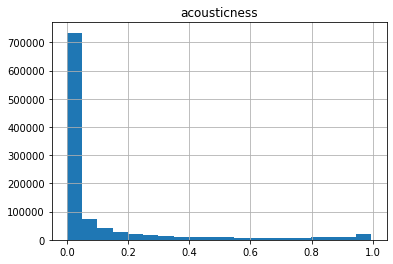

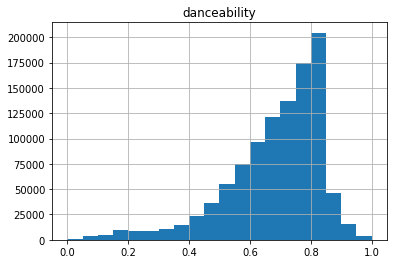

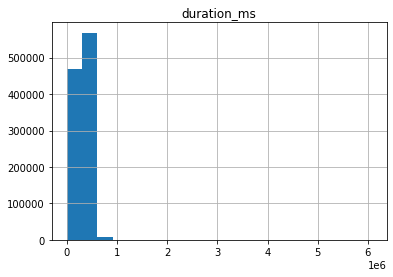

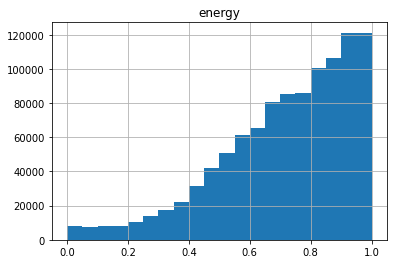

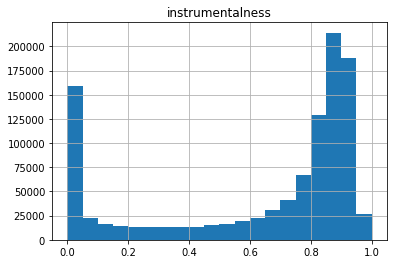

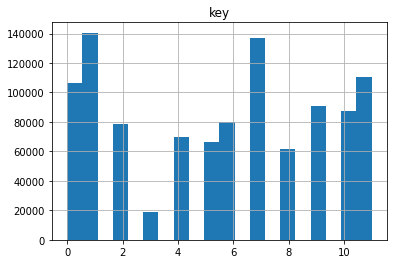

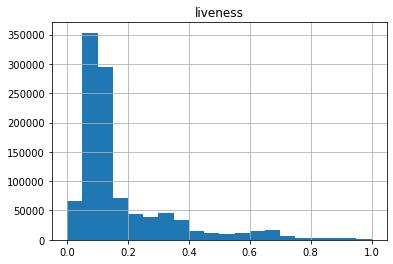

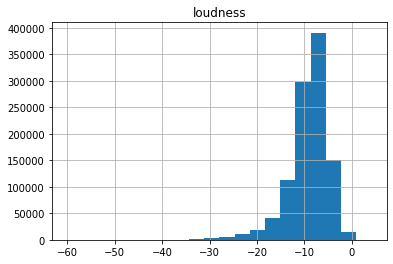

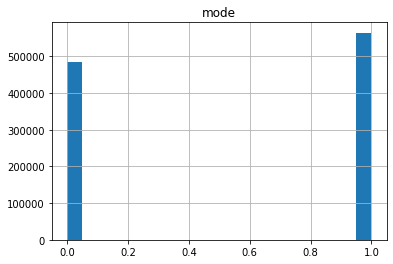

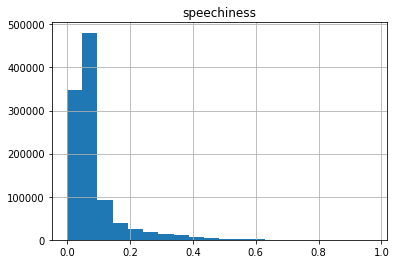

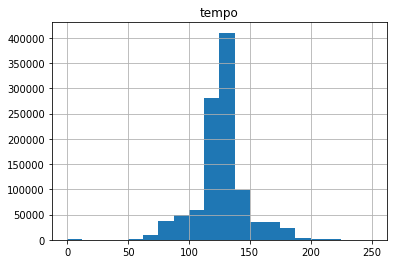

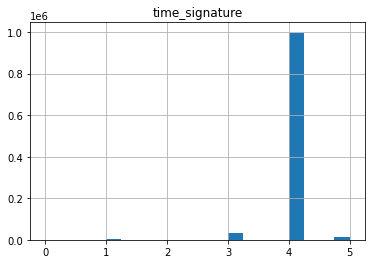

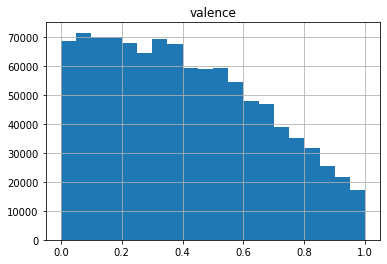

In [1071]:
num_bins = 20
#audio_feat_df_removed.hist(column=column, bins=num_bins)
for column in audio_feat_df_removed.columns:
    hist = audio_feat_df_removed.hist(column=column, bins=num_bins)
    

The features time signature and key do have missing or sparse values. This is because songs are not often written in these formats. The spareseness in this case can be discared and generally be deemed unimportant for the classification task performed by a machine learning algorithm.

### Trustworthiness of the data
The data is scraped from spotify. It would require some validation into checking whether or not the author performed his calculations on the tracks correctly. Having a good review on kaggle and being updated recently indicates that it has a good chance of being trustworthy.

### Timeliness
    The last update was as of 9/14/23, which is almost as recent as it can get for the application.


### Deficiencies
    There are not any glaring deficiencies from the exploration that I have performed.

### Available document on the data types, how the data was collected, how it was verified

Documentation: 
    https://www.kaggle.com/datasets/mcfurland/10-m-beatport-tracks-spotify-audio-features?resource=download
        
Everything is documented well. The datatypes of all the columns are thoroughly explained. The method for obtaining the data is well documented and described briefly in the "Overall Quality of the Data" section above. The validation process I see is where spotify tracks are matched to beatport tracks to assure duplicates are not put into the database.

# Extra Credit
**Describe and demonstrate**  an interesting, useful, and unusual feature of one of the data listed libraries worthy of sharing with your class. **Or** do the same with a useful feature from a data library not used here.

One hot encoding is a method performed on categorical data that has no ordinal value. The dataset I used for this exercise does not contain features that require one hot encoding. An example would be:

In [1116]:
# Extra Credit
# One hot encoding performed from sklearn

colors = ['blue', 'red', 'orange']
shapes = ['round', 'square', 'triangle']
vehicle = ['car', 'truck']

encoder = preprocessing.OneHotEncoder(categories=[colors, shapes, vehicle])

value_array = [['blue', 'round', 'car'], ['red', 'square', 'truck'], ['orange', 'triangle', 'truck']]
encoder.fit(value_array)

OneHotEncoder(categories=[['blue', 'red', 'orange'],
                          ['round', 'square', 'triangle'], ['car', 'truck']])

In [1117]:
encoder.transform([['red', 'triangle', 'car'], ['orange', 'square', 'truck'], ['blue', 'round', 'truck']]).toarray()

array([[0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1.]])

An array is created where each of the feature possibilities is represented by a 1 or a 0. The first array elements:

[0., 1., 0., 0., 0., 1., 1., 0.]

represents [ Not blue, is red, not orange | not round, is square, not triangle | is car, not truck ]